<a href="https://colab.research.google.com/github/shravankumargulvadi/Assignment-4/blob/master/Assignment_4_Fourth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fourth Design Iteration
* Omission of the 1x1 Conv layer Just before the final 4x4 Conv layer. Reason: addition of this layer brought down the performance of the network when tested in isolation. Probably because its addition reduced the number of learnable parameters.
* Increasing the no of epochs to 50.
* ## Result: Max Accuracy=99.47% attained with 14,488 parameters


# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

## Importing all the required Modules from keras

##Dropout-randomly drops specified proportion of kernels/neurons-helps in overcoming overfitting.
All other modules same as in previous assignment

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

from keras.datasets import mnist

## Seeding for Repeatability

In [0]:
seed = 7
np.random.seed(seed)

### Load pre-shuffled MNIST data into train and test sets

## Splitting the data for training and testing

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Printing Size of the image in MNIST and a sample image

(60000, 28, 28)


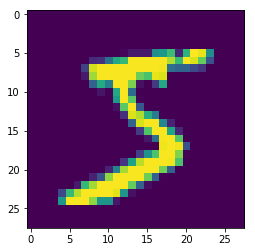

In [77]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

## Reshaping the MNIST images to 28x28x1

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

## Setting the 'type' to float32 (Decimel) and Normalizing the pixels by deviding it by 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [80]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Converting the target values to 1 hot encoding

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [29]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Building the main model

In [180]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Convolution2D(10, 1, 1, activation='relu')) #24
model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Convolution2D(14, 3, 3, activation='relu'))#10
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#8
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(18, 3, 3, activation='relu'))#6
model.add(BatchNormalization())
model.add(Dropout(0.1))



model.add(Convolution2D(20, 3, 3, activation='relu'))#4
model.add(BatchNormalization())
model.add(Dropout(0.05))



model.add(Convolution2D(10, 4, 4))  #1


model.add(Flatten())
model.add(Activation('softmax'))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

In [181]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_358 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_238 (Bat (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_238 (Dropout)        (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_359 (Conv2D)          (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_239 (Bat (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_239 (Dropout)        (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_360 (Conv2D)          (None, 24, 24, 10)        170       
__________

## Configuring the model for training
1.Loss- Is a measure of error and is the function which is to be minimized by the optimizer

2.Optimizer- optimizes the result by updating the weights in accordance with the loss

3. Metrics-A metric is a function that is used to judge the performance of the model

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)


model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])


## Creating Checkpoints to save the best weights

In [0]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

## Model training begins on training data witha each batch containing 32 images and no of epochs is 50

In [184]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=50, verbose=1, validation_data=(X_test, Y_test), callbacks=callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 46s 763us/step - loss: 0.1467 - acc: 0.9528 - val_loss: 0.0591 - val_acc: 0.9802

Epoch 00001: val_acc improved from -inf to 0.98020, saving model to weights.best.hdf5
Epoch 2/50
60000/60000 [==============================] - 30s 505us/step - loss: 0.0671 - acc: 0.9791 - val_loss: 0.0447 - val_acc: 0.9857

Epoch 00002: val_acc improved from 0.98020 to 0.98570, saving model to weights.best.hdf5
Epoch 3/50
60000/60000 [==============================] - 29s 485us/step - loss: 0.0538 - acc: 0.9830 - val_loss: 0.0338 - val_acc: 0.9904

Epoch 00003: val_acc improved from 0.98570 to 0.99040, saving model to weights.best.hdf5
Epoch 4/50
60000/60000 [==============================] - 30s 493us/step - loss: 0.0473 - acc: 0.9851 - val_loss: 0.0355 - val_acc: 0.9895

Epoch 00004: val_acc did not improve from 0.99040
Epoch 5/50
60000/60000 [==============================] - 30s 497us/step - l

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

# Reloading the weights corresponding to the highest Validation accuracy and running it on the test data

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
seed = 7
np.random.seed(seed)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [191]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Convolution2D(10, 1, 1, activation='relu')) #24

model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Convolution2D(14, 3, 3, activation='relu'))#10
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#8
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(18, 3, 3, activation='relu'))#6
model.add(BatchNormalization())
model.add(Dropout(0.1))



model.add(Convolution2D(20, 3, 3, activation='relu'))#4
model.add(BatchNormalization())
model.add(Dropout(0.05))



model.add(Convolution2D(10, 4, 4))  #1


model.add(Flatten())
model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

In [0]:
model.load_weights("weights.best.hdf5")

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Evaluate and Print score

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [195]:
print(score)

[0.024630715615079818, 0.9947]


# Max Accuracy=99.47% attained with 14,488 parameters